In [1]:
import pandas as pd
import ast
import networkx as nx
import numpy as np
from tqdm import tqdm
import netwulf
import matplotlib.pyplot as plt 

In [2]:
# Load graph 
CSS_graph = nx.read_graphml('CSS_graph.graphml')

In [3]:
# Get the Giant component 
CSS_graph_cc = sorted(nx.connected_components(CSS_graph), key=len, reverse=True)
giant = CSS_graph.subgraph(CSS_graph_cc[0])

In [4]:
giant

In [5]:
# Visualize the largest component TODO make this work!?
# netwulf.interactive.visualize(giant)

### Part 3 

In [6]:
def plot_one_hist_of_many(data, name=None, log = False, remove_empty = False, n_bins = 50, density=False, ax=None):
    """
    
    """
    # Show figure 
    plot = False
    
    # Setup. Creating bins according to the given data
    if log:
        bins = np.logspace(np.log10(max(1, int(min(data)))), max(1, np.log10(np.ceil(max(data)) + int(max(data)/20))), n_bins)
        hist, edges = np.histogram(data, bins = bins, density=True) # Probability density to not penalise the first bins for being smaller.
    else:
        bins = np.linspace(int(min(data)), np.ceil(max(data)) + int(max(data)/20), n_bins)
        hist, edges = np.histogram(data, bins = bins, density=density)

    x = (edges[:-1] + edges[1:])/2

    # Create the plot
    if ax == None: 
        plot = True # only show figure if not given an ax 
        fig, ax = plt.subplots()

    # Remove bins without any points in
    if remove_empty:
        xx,yy = zip(*[(i,j) for (i,j) in zip(x, hist) if j > 0])
        # ax.bar(xx, yy, width = width)
        ax.plot(xx,yy, marker = '.')
    else:
        #ax.bar(x, hist, width = width * 0.98)
        ax.plot(x, hist, marker = '.')
    
    # Only plot if it is the only one (otherwise the titles do not make sense)
    if plot: 
        ax.set_title(f'Probability density function for {name}')
        ax.set_xlabel(name)
    
    #Sets the histogram to log-log scale
    if log:
        ax.set_ylabel('Probability density')
        ax.set_xscale('log')
        ax.set_yscale('log')
    else: 
        ax.set_ylabel('Counts')
        
    if plot: plt.show()

#### 2.1 

Random Network: In this exercise we will create a Random Network as a "null model" to investigate some properties of the Computational Social Scientists Network.

Compute the value of p such that the number of expected edges of the random network equals the number of edges in the Computational Social Scientists network (see equation 3.2 in your Network Science Book). What is the value of p? Compute the average value of the degree < k > (using the formula).
Use : $$L = p N(N-1)/2 \iff 2*L/(N^2 - N) = p$$

In [7]:
# Compute p 
p = 2 * CSS_graph.number_of_edges() / (CSS_graph.number_of_nodes()** 2 - CSS_graph.number_of_nodes()) 
k = p * (CSS_graph.number_of_nodes() - 1)
print(f"p = {p}, k = {k}")

p = 0.00027798201811642467, k = 2.981635126316771


Create a Random network with the same number of nodes as the Computational Social Scientists networks, and p as computed above. Generate a random network by linking nodes in every possible pair with probability p. Hint: you can use the function np.random.uniform to draw samples from a uniform probability distribution.

In [8]:
# Make the random graph 
random_graph = nx.erdos_renyi_graph(CSS_graph.number_of_nodes(), p)

In [9]:
# Check if the graph has the right attributes, 
# 2 * random_graph.number_of_edges() / (CSS_graph.number_of_nodes()** 2 - CSS_graph.number_of_nodes()) # 

Visualize the network as you did for the Computational Social Scientists network in the exercise above (my version is below). Comment on the differences between the two.

In [10]:
# TODO does not work 

#### 2.2 

Degree Distribution: In this exercise, we will compare the degree distribution of the real network and its random counterpart.

Compute the distribution of degree for the random network using the numpy function np.histogram. Bin your histogram using 10 linearly spaced bins. Remember to pass the parameter density=True.

Compute the distribution of degree for the Computational Social Scientists network using the numpy function np.histogram. Bin your histogram using 10 logarithmically spaced bins. Remember to pass the parameter density=True.

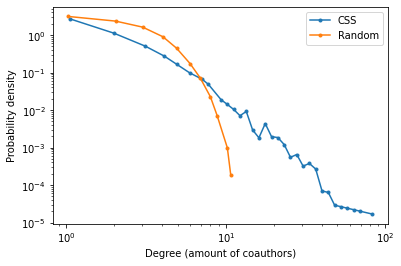

In [11]:
random_graph_degrees = list(dict(random_graph.degree()).values())
CSS_graph_degrees = list(dict(CSS_graph.degree()).values())

fig, ax = plt.subplots()

plot_one_hist_of_many(CSS_graph_degrees, remove_empty=True, density=True, log=True, ax=ax)
plot_one_hist_of_many(random_graph_degrees, remove_empty=True, density=True, log=True, ax=ax)
ax.legend(["CSS", "Random"])
ax.set_xlabel("Degree (amount of coauthors)")
plt.show()

Comment the figure. What are the differences between the two distributions? Why did I ask you to use two different types of binning?

TODO comment 

What is the average degree of the random and the real network? Comment on the relation between the two.

TODO comment 

In [12]:
print(f"Average degree of CSS graph {np.mean(CSS_graph_degrees)}, average degree of random graph {np.mean(random_graph_degrees)}")

Average degree of CSS graph 2.9816351263167706, average degree of random graph 2.9984152139461173


#### 2.3 

Shortest Paths: Here, we will check if the Computational Social Scientists Network is a small-world Network.

Compute the average shortest path for the largest connected component of the Computational Social Scientists network (for a reminder of the definition of connected components, check section 2.9 of the Network Science book). You can use the following steps:
Use nx.algorithms.connected_components to find all connected components (it returns a list of subsets of the original set of nodes).
Consider the largest subset of nodes found in the step above. Build the subgraph of your original network containing those nodes exclusively, using nx.Graph.subgraph. This corresponds to your largest connected component (a.k.a giant component).

Compute the average shortest path length of the giant component using nx.average_shortest_path_length

In [13]:
avg_CSS_degree = nx.average_shortest_path_length(giant)
print(avg_CSS_degree)

7.250517168544178


Compute the average shortest path length for the giant component of the random network you built in exercise 2.1.

In [14]:
# Find giant component again 
random_graph_cc = sorted(nx.connected_components(random_graph), key=len, reverse=True)
random_giant = random_graph.subgraph(random_graph_cc[0])

# Compute average shortest path 
avg_random_degree = nx.average_shortest_path_length(random_giant)
print(avg_random_degree)

8.407122845984041


Comment on the relation between the average shortest path length in the real and the random networks. Can you conclude that the small-world property apply to the Computational Social Scientists network?

TODO comment 

#### 2.4 

Clustering: Here, we will compare the clustering coefficient in the Computational Social Scientists Network and its random counterpart.

Compute the clustering coefficient for all nodes in the random network, using the formula 2.15 in your book. Hint: To check your method, you can compare your results with those obtained using the networkx clustering function.

$$C_i = 2*L_i / (k_i (k_i - 1))$$

In [22]:
def clustering_coef(graph, node): 
    """Calculate the clustering coefficient of "node" in "graph" 

    Args:
        graph (networkX.graph): The graph in question
        node (networkX.node): The node in "graph" in question

    Returns:
        C (float): The clustering coeffiecent of "node" in "graph" 
    """
    # Neighbors of node 
    neighbors = set(graph.neighbors(node)) 
    k = len(neighbors)
    
    # After making the neighbors their own graph all edges constitutes as a neighbor connecting to a neighbor
    subgraph = graph.subgraph(neighbors)
    L = subgraph.number_of_edges() 
    
    # Calculate coeffient 
    C = 2*L/(k*(k-1)) if k > 1 else 0 
    return C
    

In [29]:
def average_cluster_coef(graph): 
    """Calculate the average clustering coefficient of "graph" 

    Args:
        graph (networkX): The graph in question 

    Returns:
        avg_c (float): Average clustering coefficient of "graph"
    """
    # Take the sum of all clustering coefficients 
    cum_sum = 0 
    for node in graph.nodes(): 
        cum_sum += clustering_coef(graph, node)
        
    # Take the average 
    avg_c = cum_sum / len(graph)
    
    return avg_c

In [30]:
print(f"The average cluster coefficient for the CSS graph is {average_cluster_coef(giant)}")
print(f"The average cluster coefficient for the random graph is {average_cluster_coef(random_giant)}") 

# Check if it is correct 
print(nx.average_clustering(giant))
print(nx.average_clustering(random_giant))

The average cluster coefficient for the CSS graph is 0.6026236264543661
The average cluster coefficient for the random graph is 0.00029631733409069395
0.6026236264543661
0.00029631733409069395


Compute the average clustering across nodes of the random network. Is it consistent with the analytical prediction (network science book equation 3.21)?
$$C_i = <k>/N = p$$

Yes - pretty much 

In [32]:
print(average_cluster_coef(random_graph))

0.00027789245650716704


Compute the average clustering coefficient for the Computational Social Scientists network. How does it compare to its random counterpart? Is it something you would expect? Why?

TODO comment 

In [33]:
print(average_cluster_coef(CSS_graph))

0.39649440358920396
